In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve,roc_auc_score, ConfusionMatrixDisplay
from scipy.stats import skew
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler


In [2]:
breast_cancer = load_breast_cancer()
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target

In [3]:
print("First few rows of the Breast Cancer dataset:")
print(df.head())

First few rows of the Breast Cancer dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  

In [4]:
print("Missing values in dataset:\n", df.isnull().sum())

Missing values in dataset:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


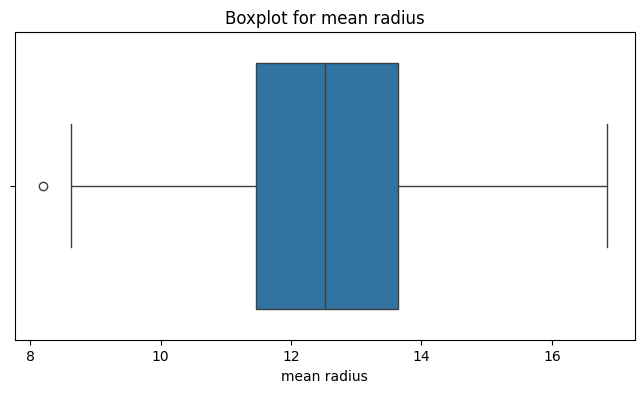

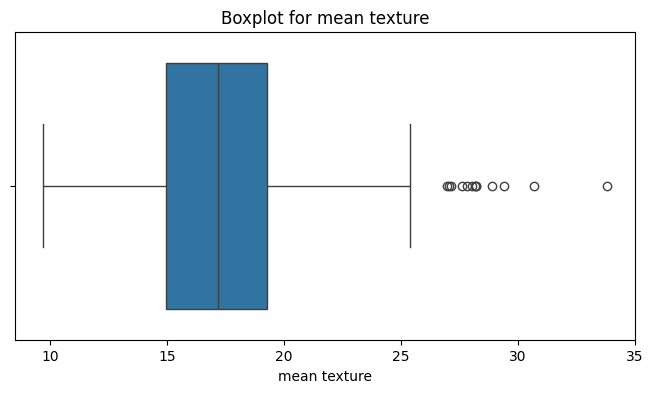

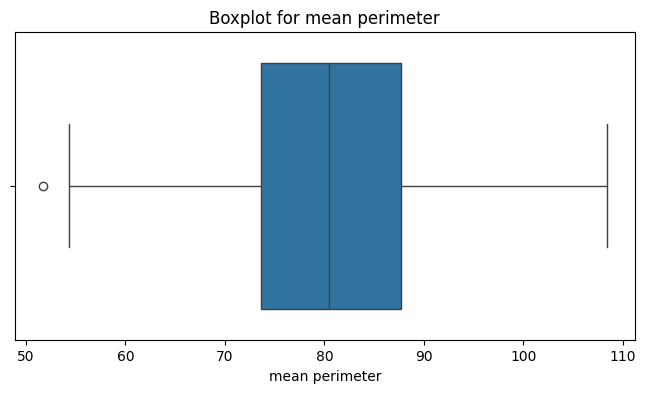

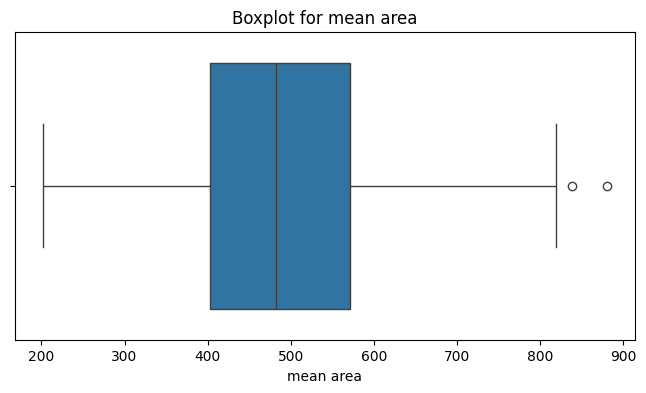

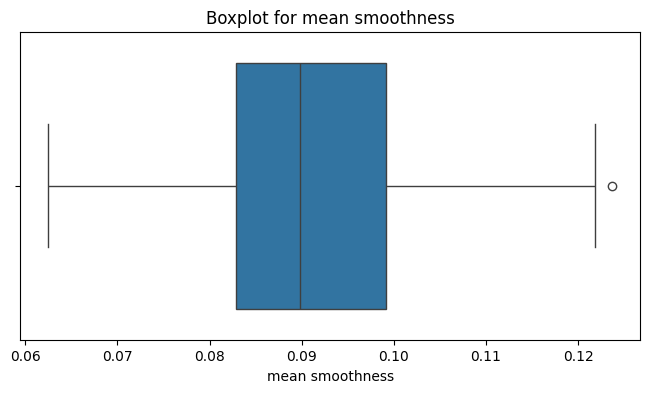

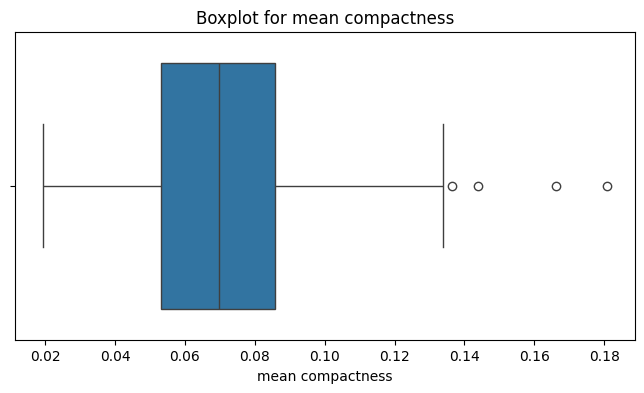

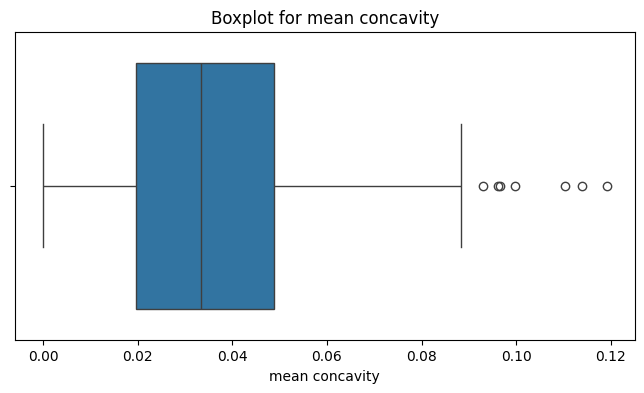

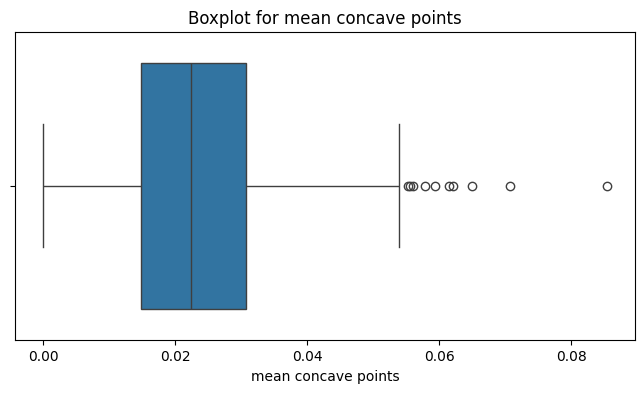

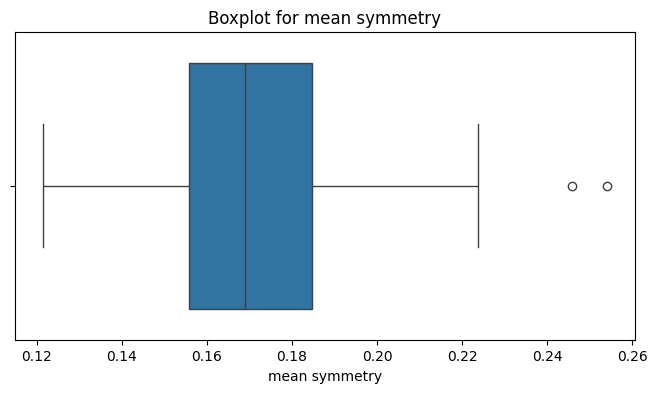

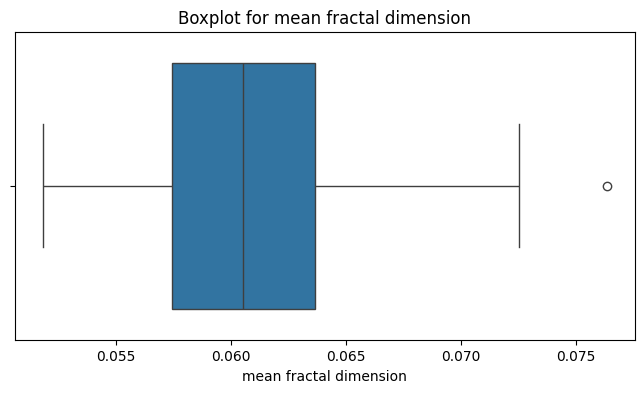

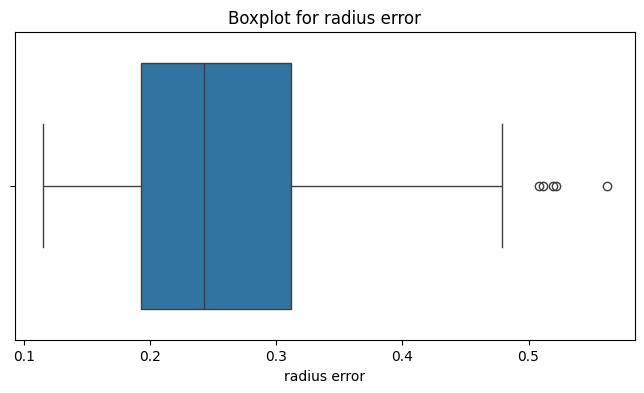

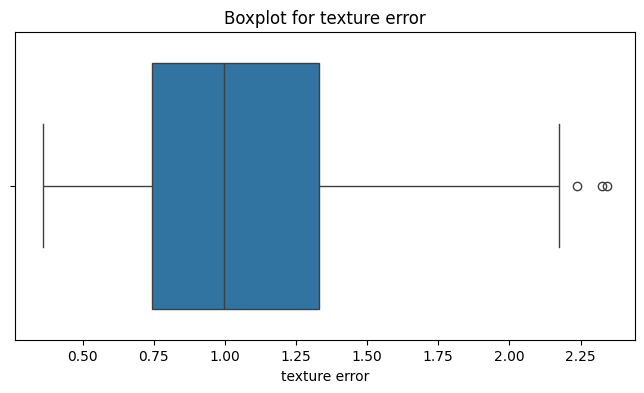

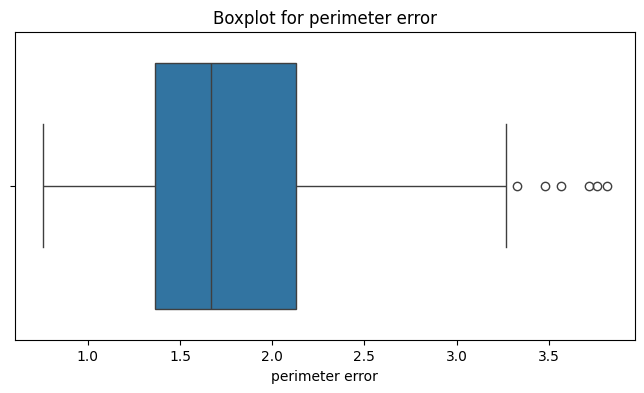

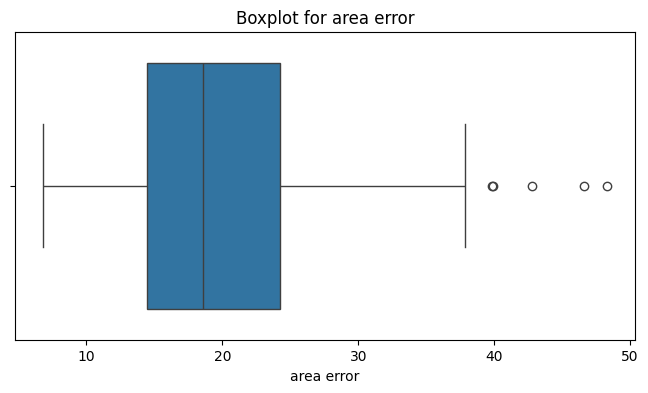

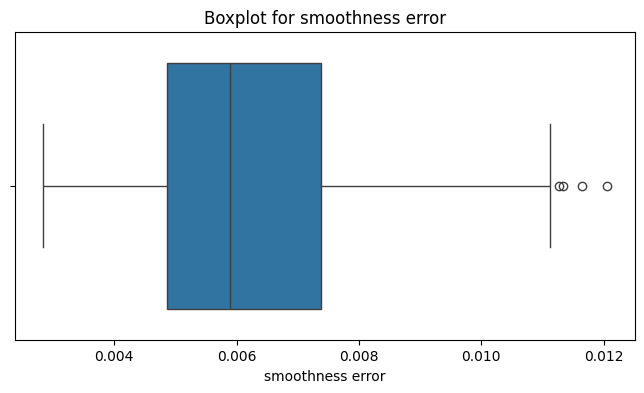

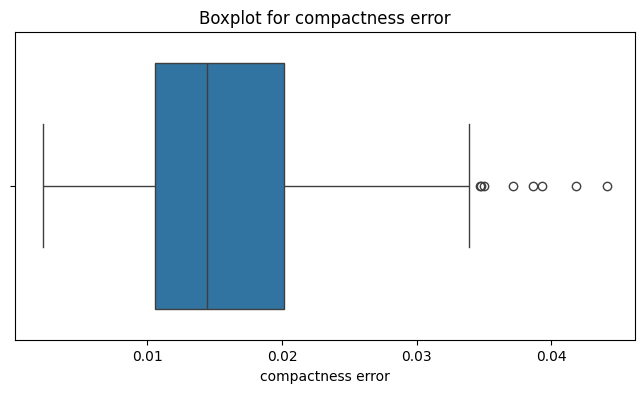

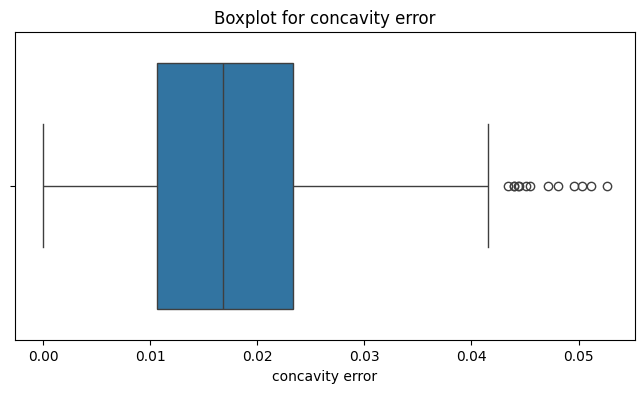

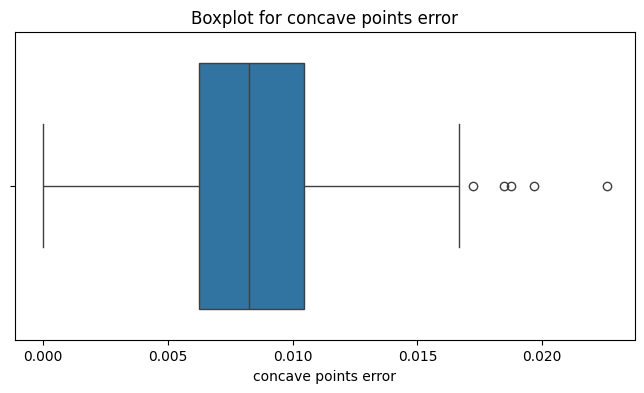

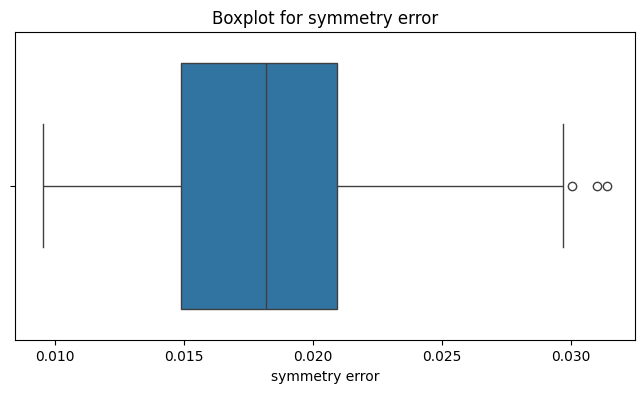

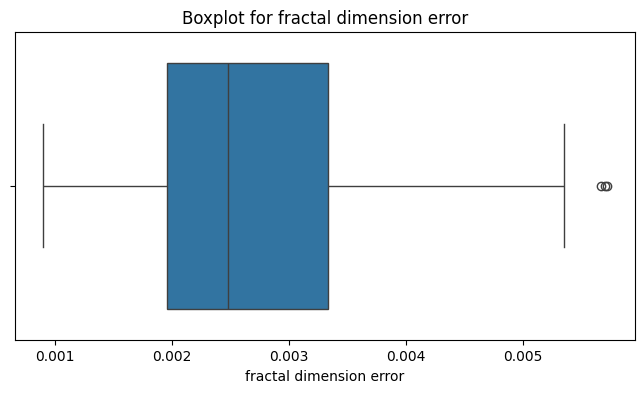

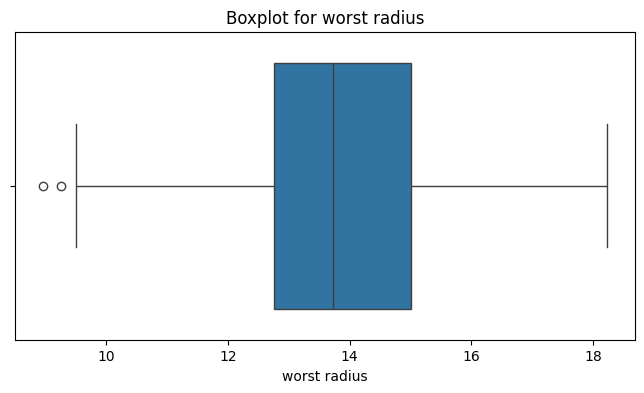

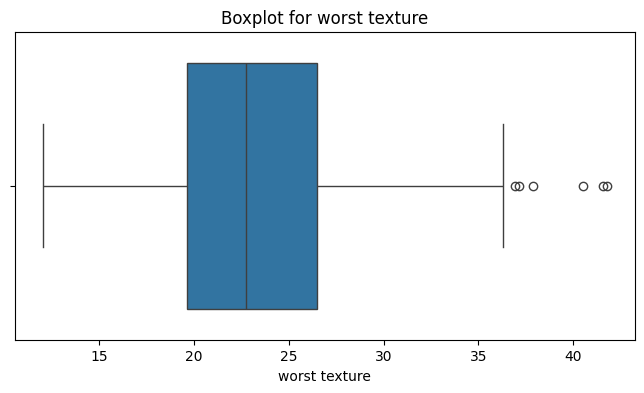

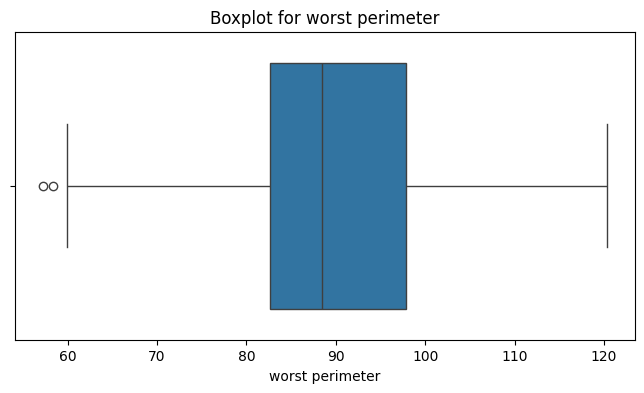

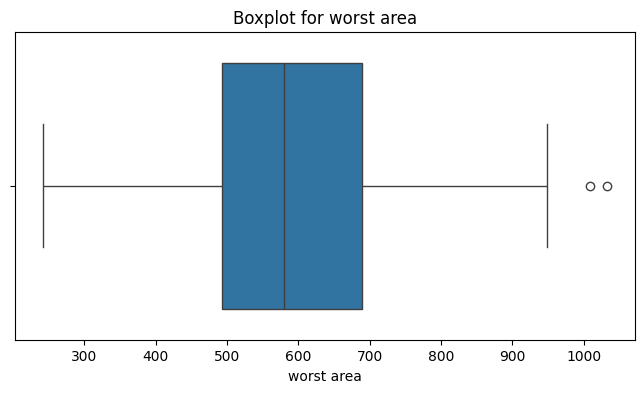

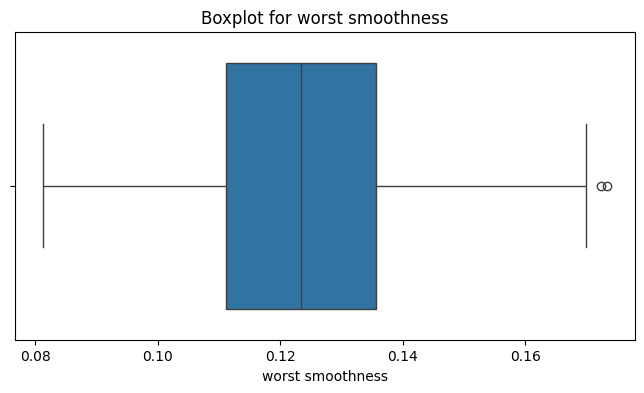

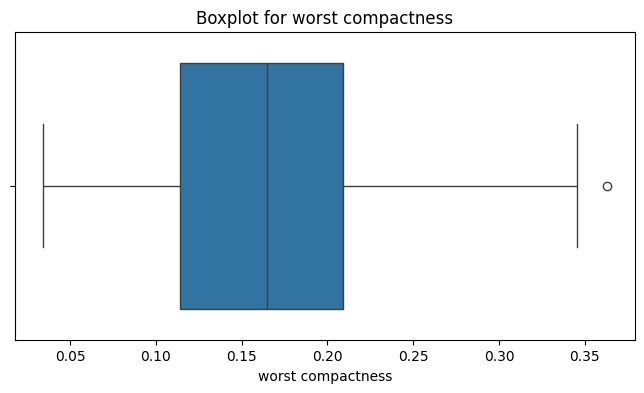

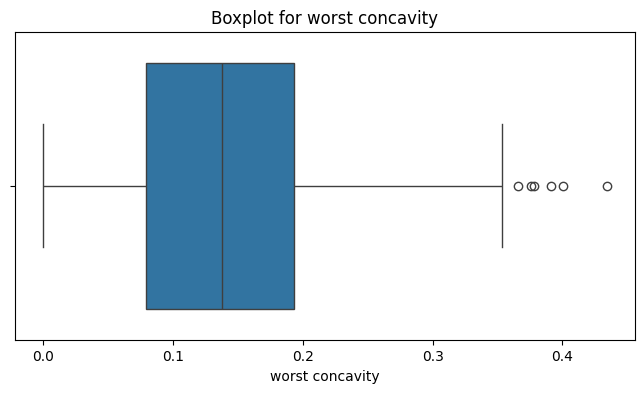

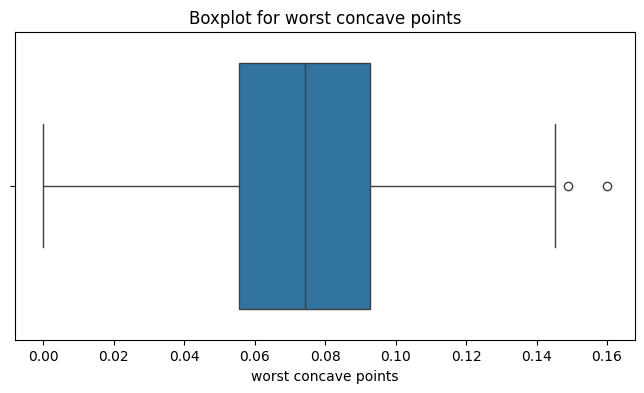

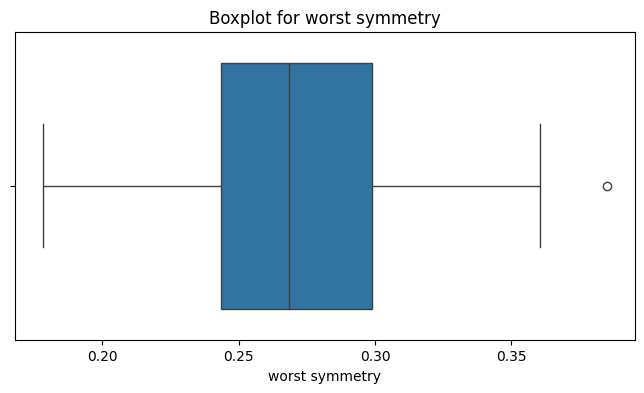

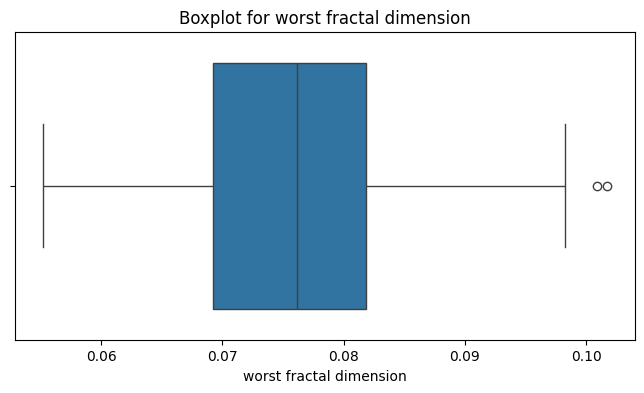

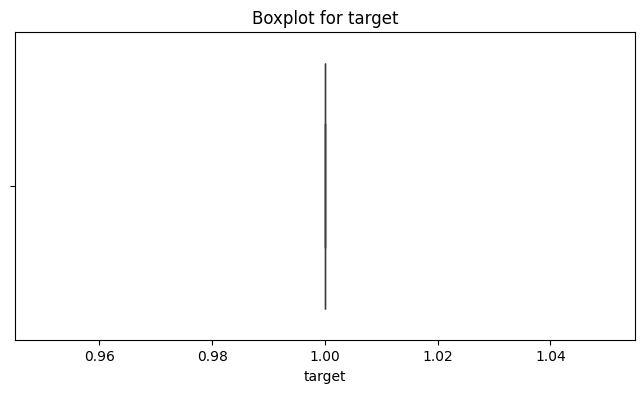

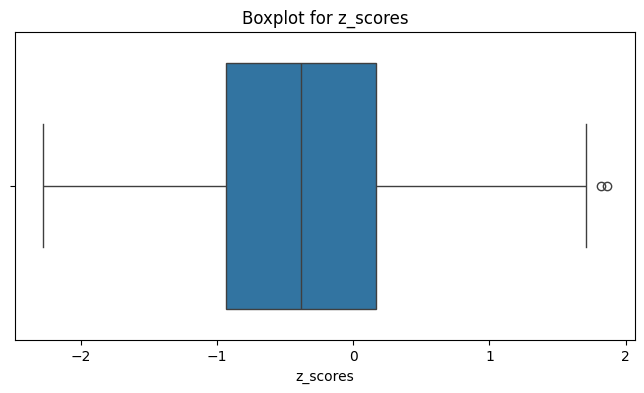

In [12]:
for column in df.columns:
    if df[column].dtype != 'object':  
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot for {column}')
        plt.show()

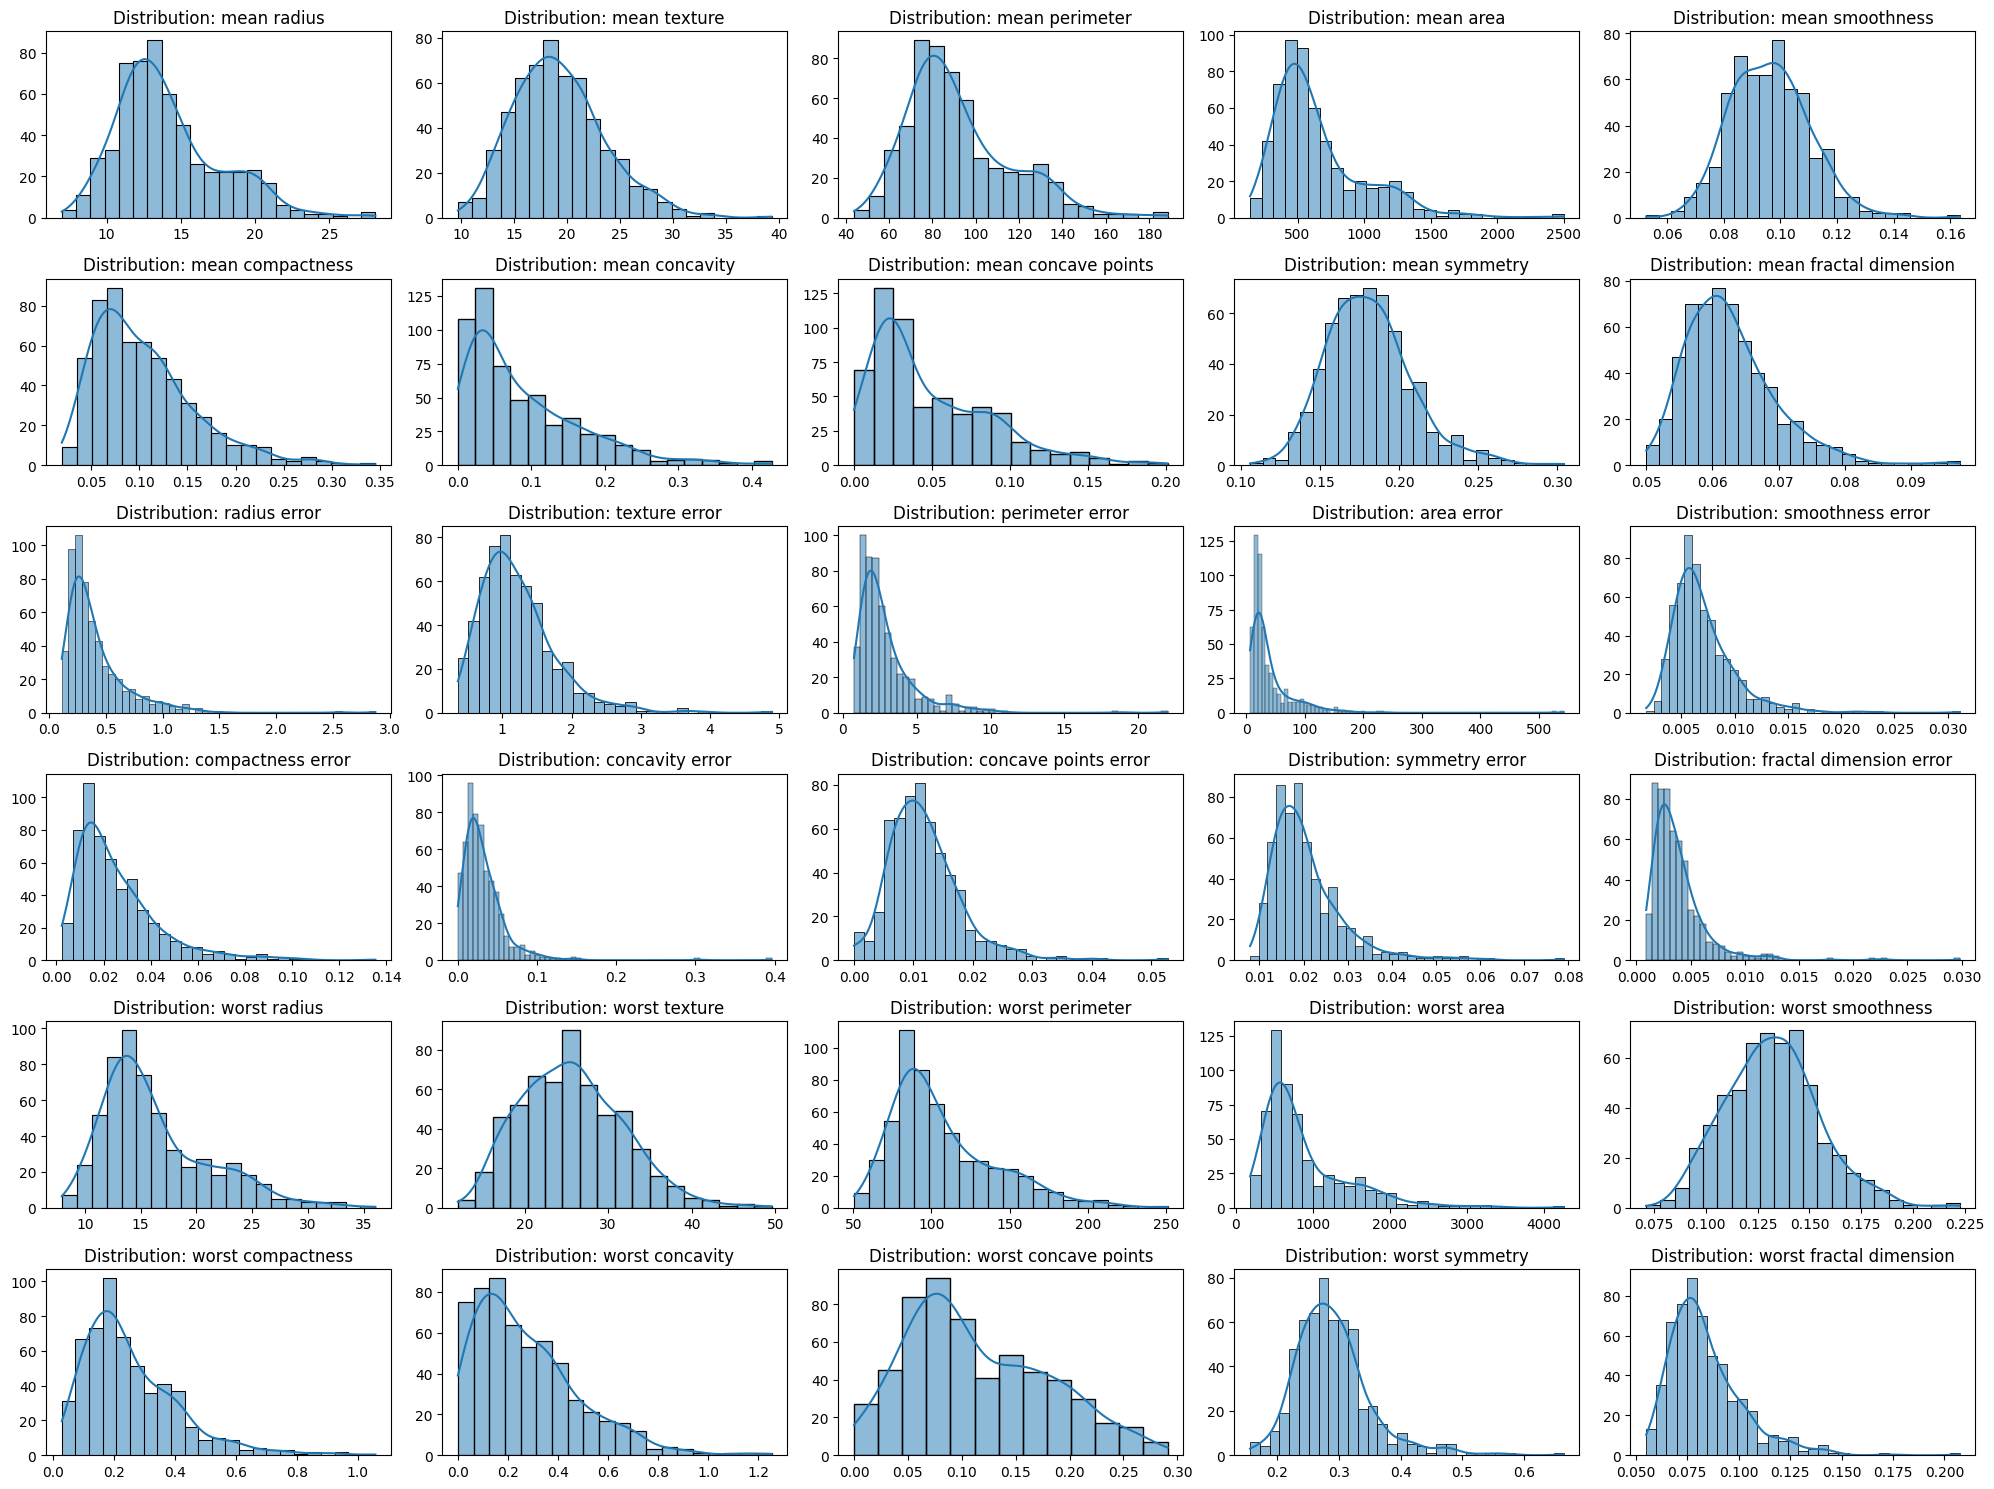

In [6]:

plt.figure(figsize=(20, 15))

for i, column in enumerate(df.columns[:-1]):
    plt.subplot(6, 5, i + 1)  # Adjust the grid based on the number of features (30 in this case)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution: {column}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


In [7]:
for column in df.columns:
    if df[column].dtype != 'object':
        column_skewness = skew(df[column].dropna()) 
        if abs(column_skewness) < 0.5: 
            df['z_scores'] = zscore(df[column].dropna())
            df = df[(df['z_scores'] < 3) & (df['z_scores'] > -3)]
            print(f'Removed outliers using Z-score for {column}')
df.shape            

Removed outliers using Z-score for mean smoothness
Removed outliers using Z-score for worst texture
Removed outliers using Z-score for worst smoothness


(557, 32)

In [8]:
for column in df.columns:
    if df[column].dtype != 'object':
        column_skewness = skew(df[column].dropna())  
        if abs(column_skewness) > 0.5: 
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
            print(f'Removed outliers using IQR for {column}')
df.shape

Removed outliers using IQR for mean radius
Removed outliers using IQR for mean perimeter
Removed outliers using IQR for mean area
Removed outliers using IQR for mean compactness
Removed outliers using IQR for mean concavity
Removed outliers using IQR for mean concave points
Removed outliers using IQR for mean fractal dimension
Removed outliers using IQR for radius error
Removed outliers using IQR for texture error
Removed outliers using IQR for perimeter error
Removed outliers using IQR for area error
Removed outliers using IQR for smoothness error
Removed outliers using IQR for compactness error
Removed outliers using IQR for concavity error
Removed outliers using IQR for symmetry error
Removed outliers using IQR for fractal dimension error
Removed outliers using IQR for worst perimeter
Removed outliers using IQR for worst area
Removed outliers using IQR for worst compactness
Removed outliers using IQR for worst concavity
Removed outliers using IQR for worst symmetry
Removed outliers 

(262, 32)

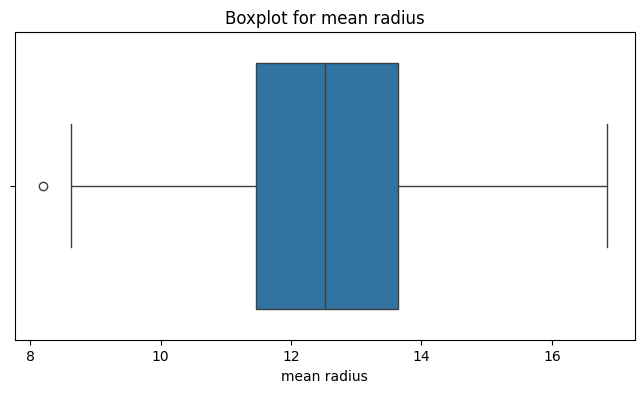

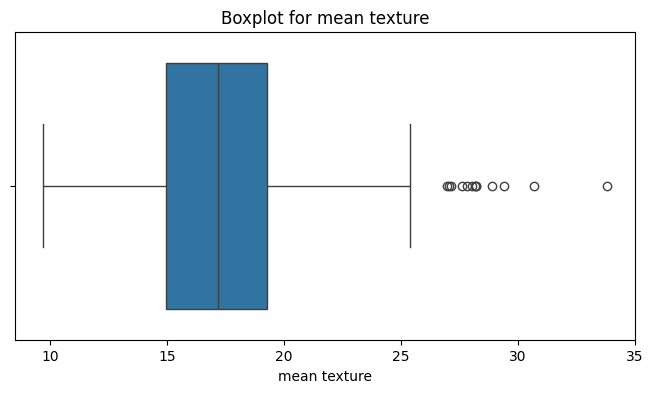

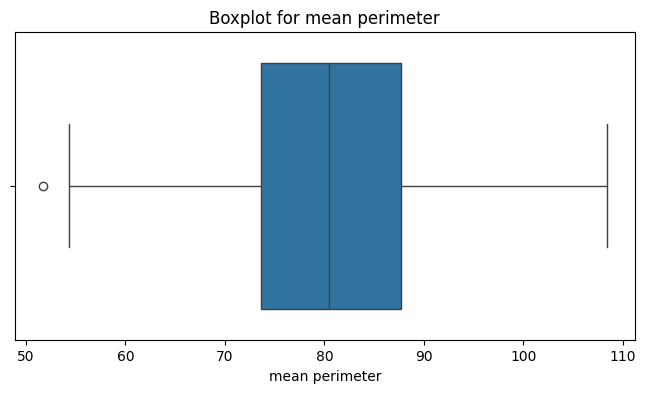

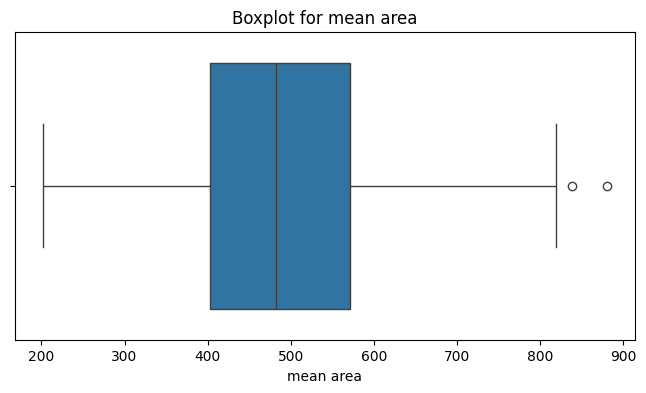

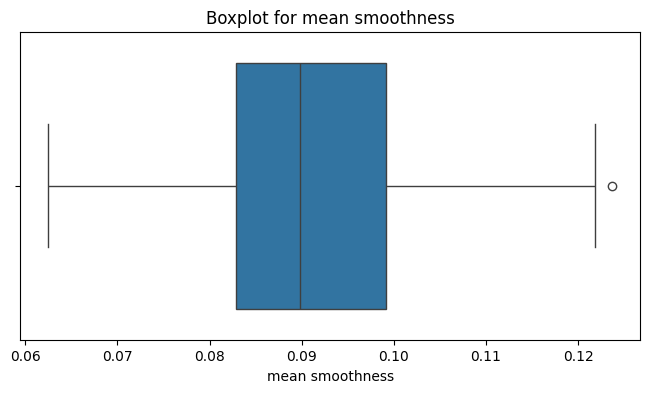

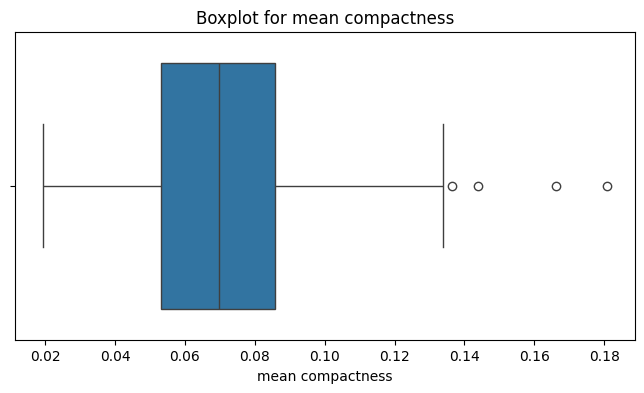

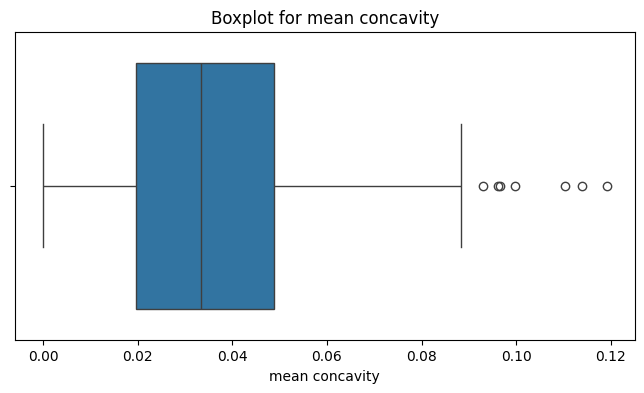

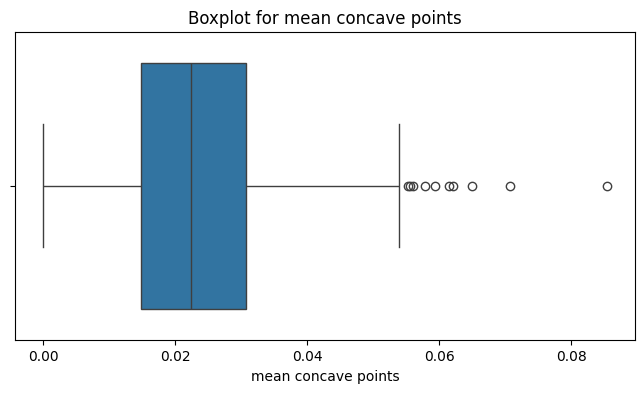

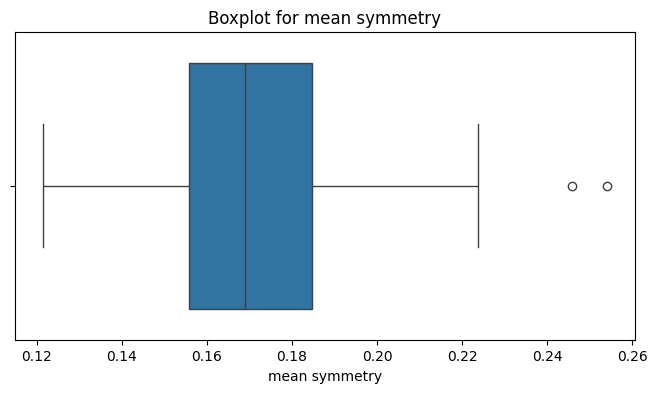

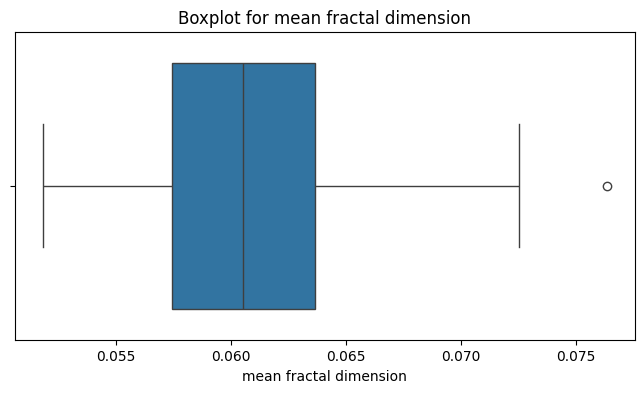

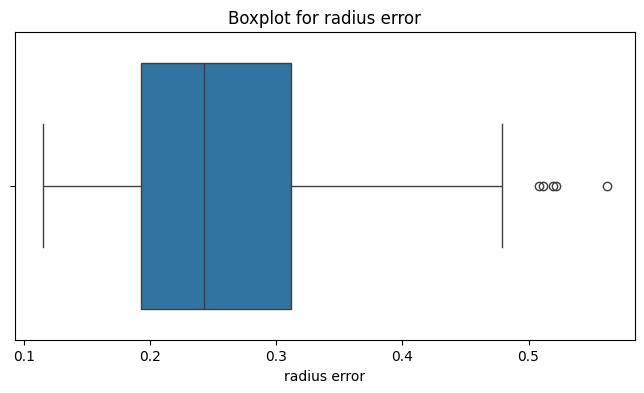

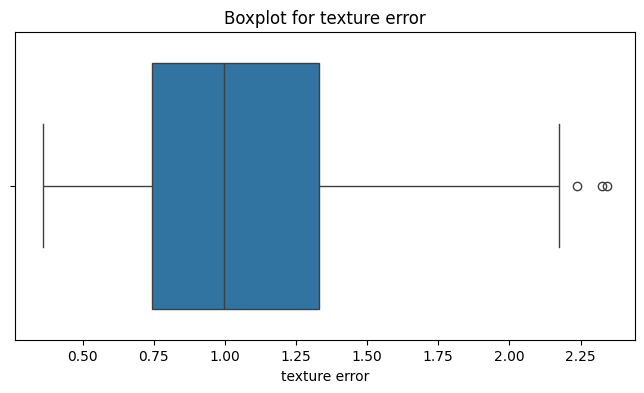

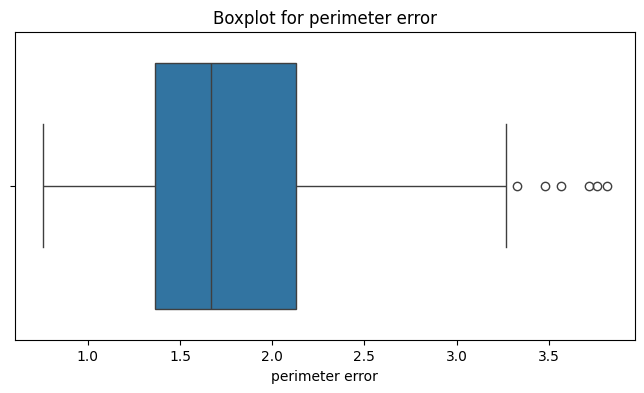

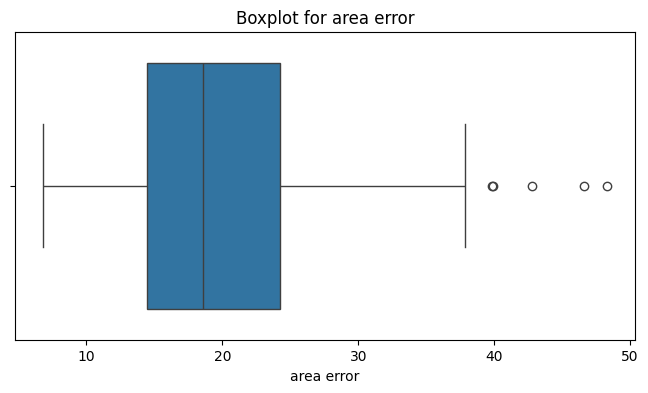

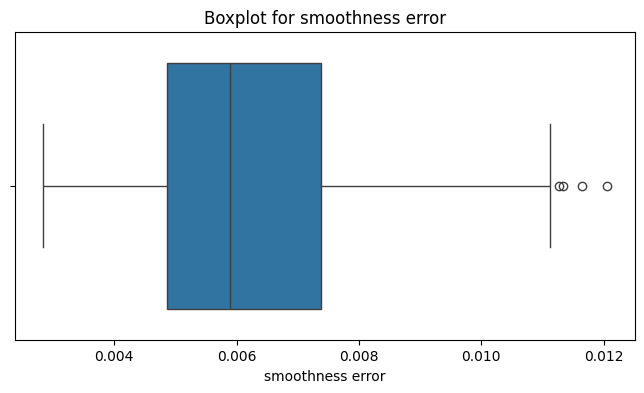

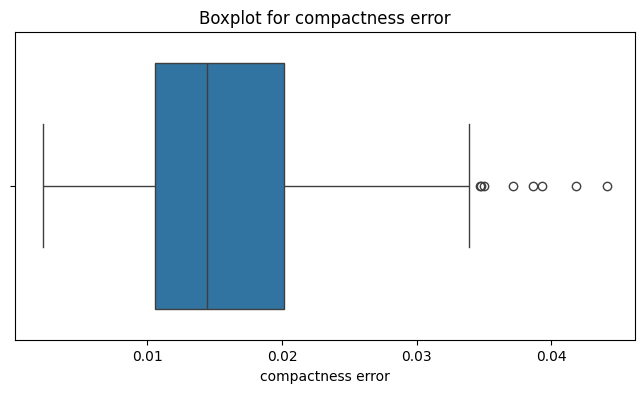

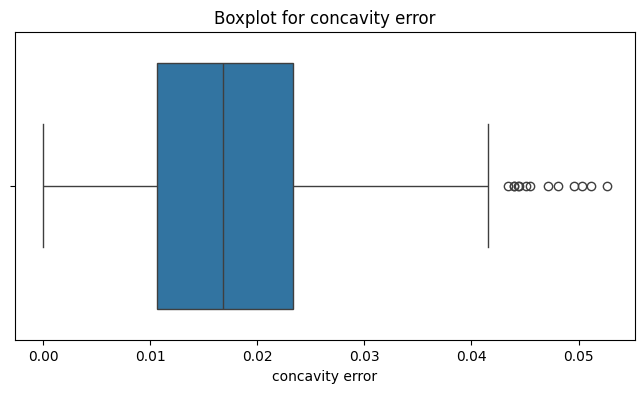

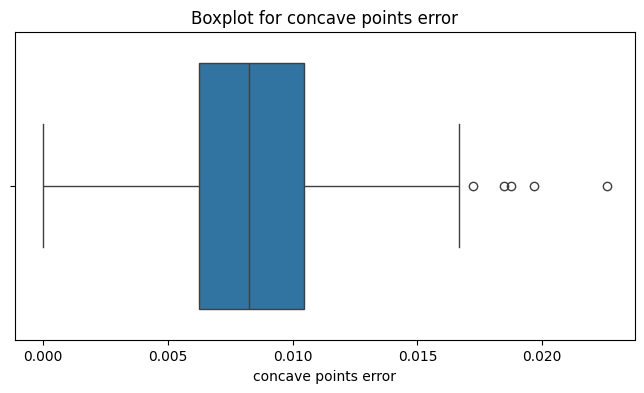

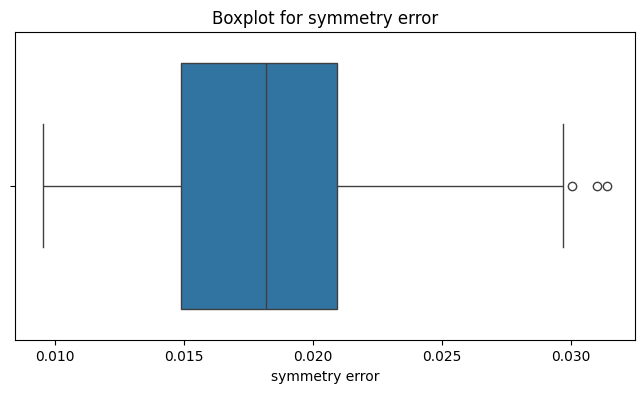

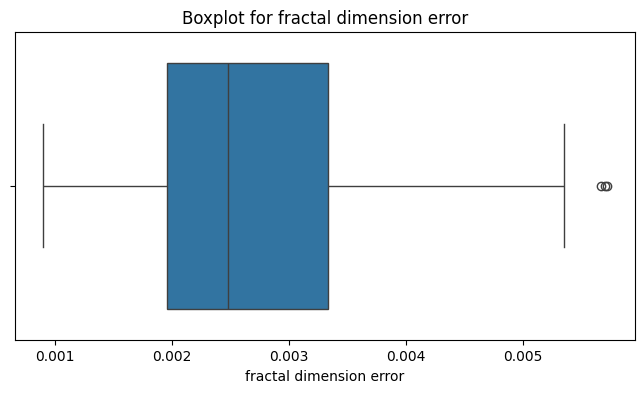

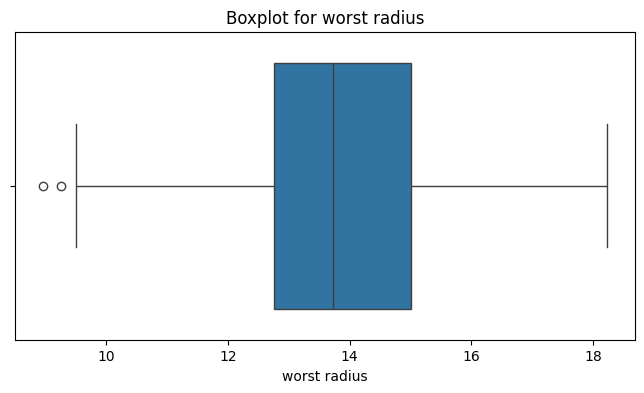

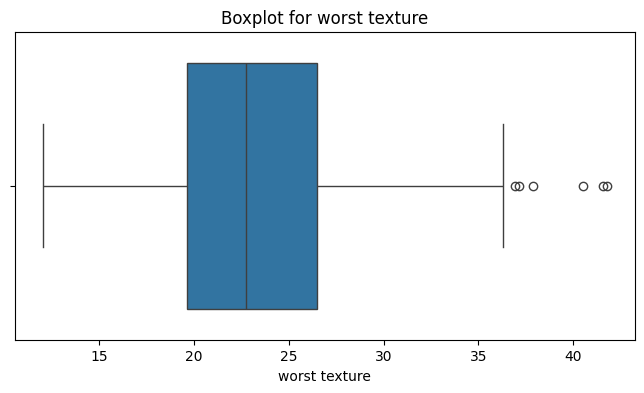

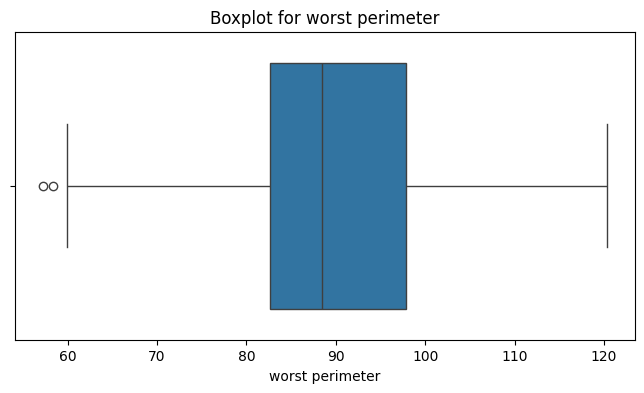

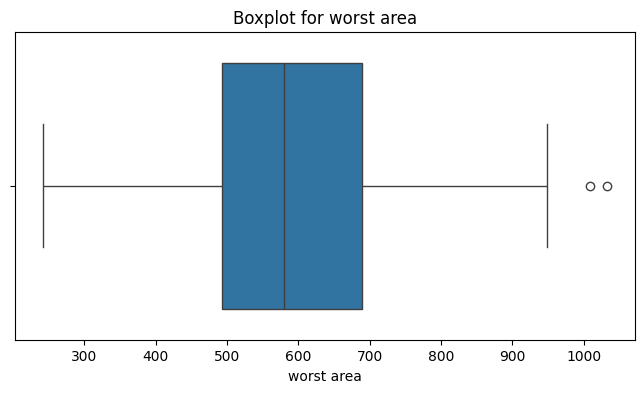

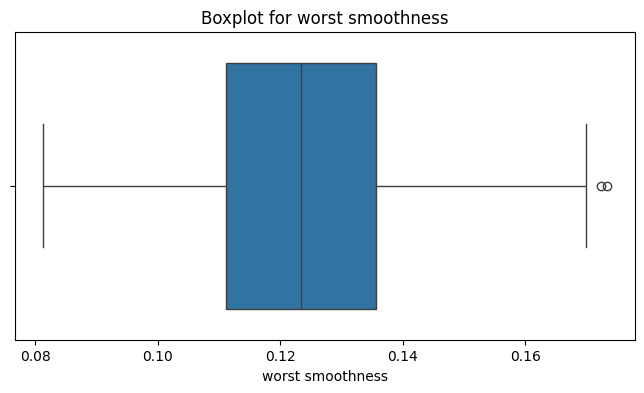

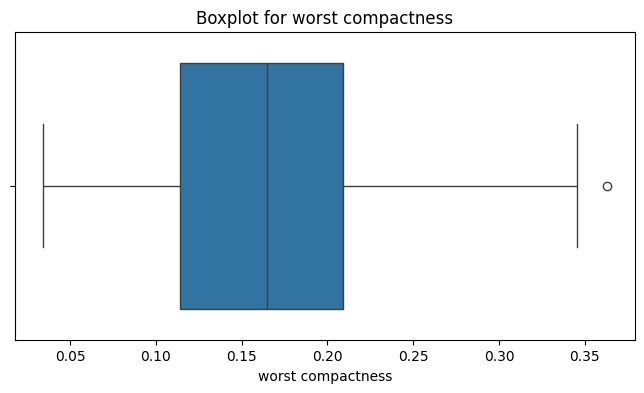

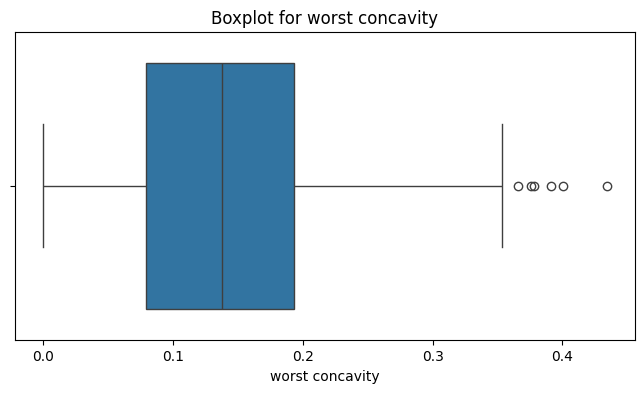

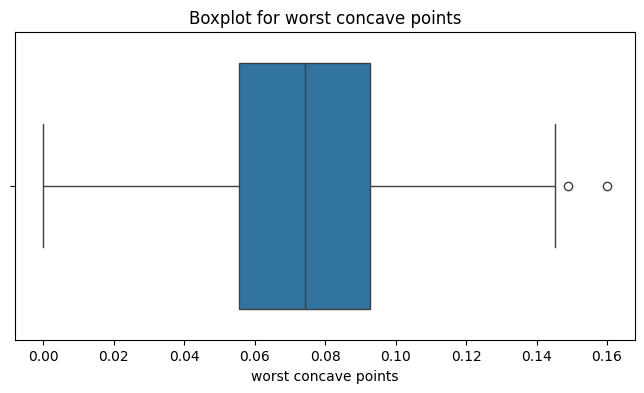

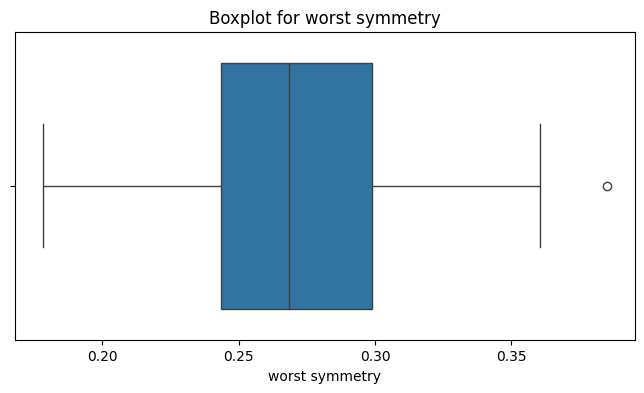

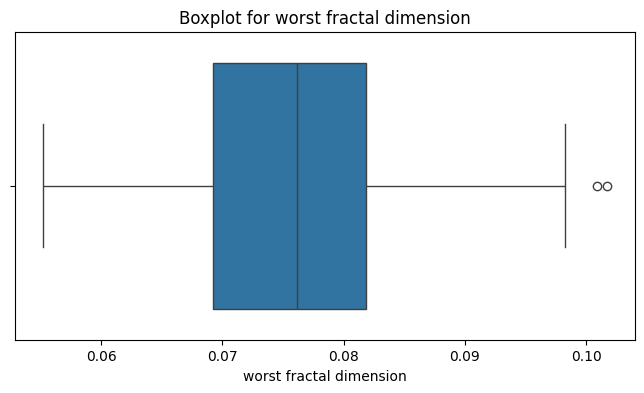

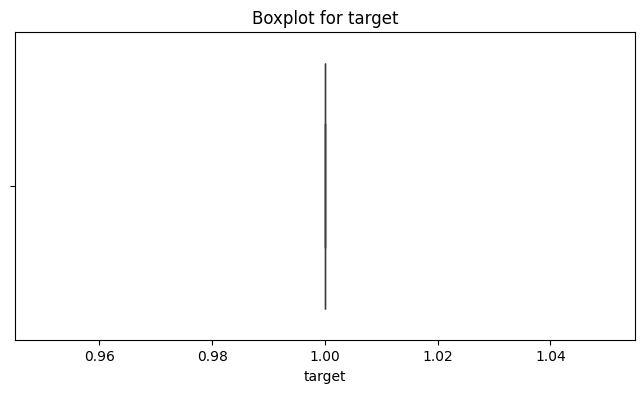

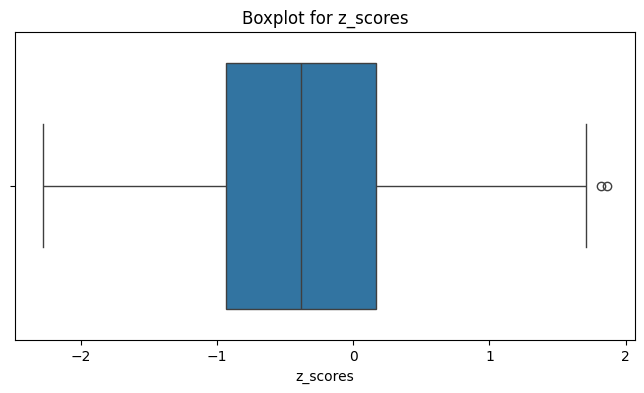

In [9]:
for column in df.columns:
    if df[column].dtype != 'object':  
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot for {column}')
        plt.show()

In [10]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic_regressor = LogisticRegression(max_iter=10000)
logistic_regressor.fit(X_train_scaled, y_train)
y_pred = logistic_regressor.predict(X_test_scaled)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logistic_regressor.predict_proba(X_test_scaled)[:, 1])  

print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC Score:", roc_auc)


Accuracy: 0.9649122807017544
Precision: 0.9701492537313433
Recall: 0.9701492537313433
ROC AUC Score: 0.9933312162591299


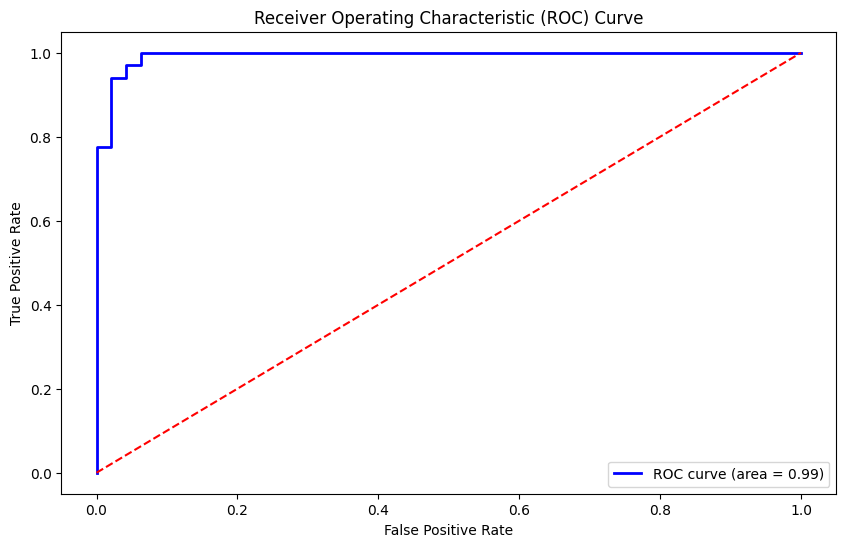

In [ ]:
y_prob = logistic_regressor.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', linewidth=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

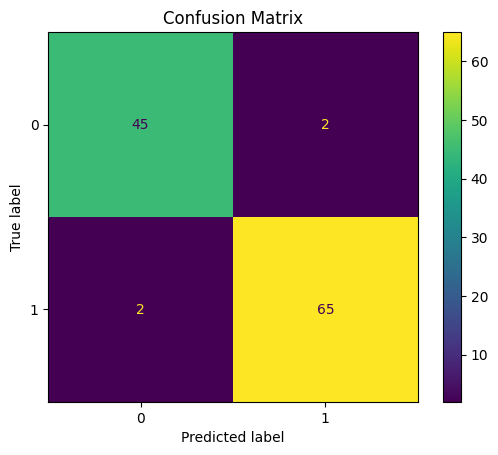

In [ ]:
ConfusionMatrixDisplay.from_estimator(logistic_regressor, X_test_scaled, y_test)
plt.title('Confusion Matrix')
plt.show()